In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path


In [13]:
# Import the data
lending_df = pd.read_csv("Resources/lending_data.csv")
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [14]:
# checking the type of the value into the dataset
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


# Prediction

In this project, I will said that the Logistic regression model will perform better than the Random Forest

In [38]:
# Taking out the loan_status that represent the outcome which will be passed to y
# Split the data into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
y = lending_df['loan_status'].values
X = lending_df.drop('loan_status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [40]:
np.unique(y)

array([0, 1], dtype=int64)

In [44]:
#scaling data based on the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

* Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.
* 0 and 1 are the labels that are assigned to the "objects or questions" we are looking at. For example in this project, we are looking to predict if the lender will meet the requirements to be approved or not approved for the loan. We want a model that will produce values between 0 and 1 and will interpret the value of the model as a probability of the test case being positive or negative (true or false).


In [72]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [73]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [74]:
# Train a Logistic Regression model print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [53]:
# retrieving the accuracy
tp,tn,fp,fn = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn) 
# (18699 + 539) / (18699 + 539 + 53 + 93)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9694593479158069


In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



# Random Forest Classifier

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* Random forest is a supervised learning technique for classification and regression algorithms in machine learning. It's a classifier that combines a number of decision trees on different subsets of a dataset and averages the results to increase the dataset's predicted accuracy.

In [61]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


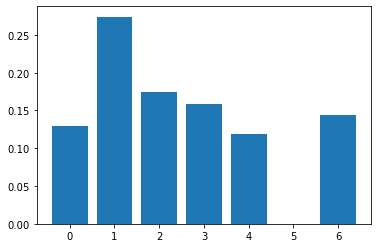

In [64]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [66]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

### Fit a LogisticRegression model and RandomForestClassifier model

In [77]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\javim\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [69]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [71]:
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


# Analysis


My prediction is wrong. As it can be seen that both models testing score have not significant different. The LRM has a testing score of 0.9918 while the RFM's testing score is 0.9917. However, if considering the training score, the one displayed with the RFM is higher than the one detected with the LRM.
Overall, both models show positive trends

